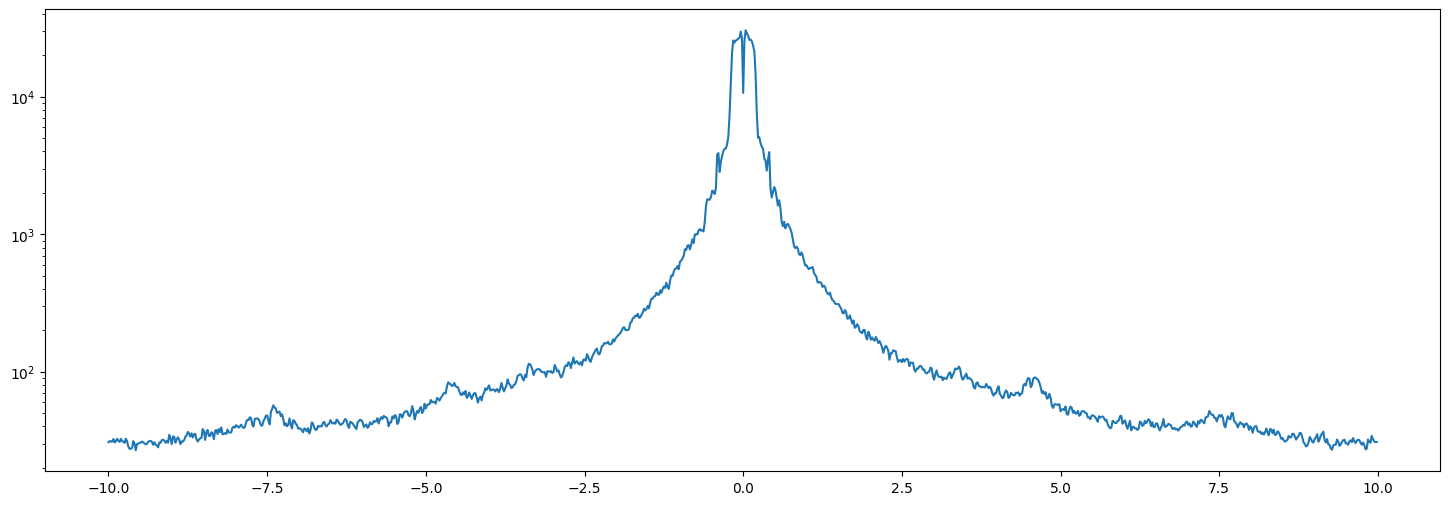

In [1]:
import numpy as np
from scipy import signal as sig
import matplotlib.pyplot as plt

# Cargar el archivo .cs8
file_path = r'C:\Samples-Hack-RF\88108.cs8'

# Leer los datos IQ como enteros de 8 bits
with open(file_path, 'rb') as f:
    raw_data = np.frombuffer(f.read(), dtype=np.uint8)

# Convertir los datos en vectores IQ (asumiendo que IQ intercalado)
I = raw_data[0::2]  # Datos I en las posiciones pares
Q = raw_data[1::2]  # Datos Q en las posiciones impares

# # Opcionalmente, normalizar los valores I y Q
# I = (I - 128) / 128.0
# Q = (Q - 128) / 128.0

# Combinar I y Q en formato complejo
IQ_data = I + 1j * Q

f, Pxx = sig.welch(IQ_data[:200000], fs=20, nperseg=1024, return_onesided=False)
f = np.fft.fftshift(f)
Pxx = np.fft.fftshift(Pxx)


plt.figure(figsize=(18,6))
plt.plot()
plt.semilogy(f, Pxx)
plt.show()

In [13]:
IQ_sample = IQ_data[:IQ_data.shape[0]//10000]


N = IQ_sample.shape[0]  # Number of samples
fs = 20e6  # Sampling frequency
T = N / fs  # Total duration

# Time vector with same length as IQ_data
t = np.linspace(0, T, N)

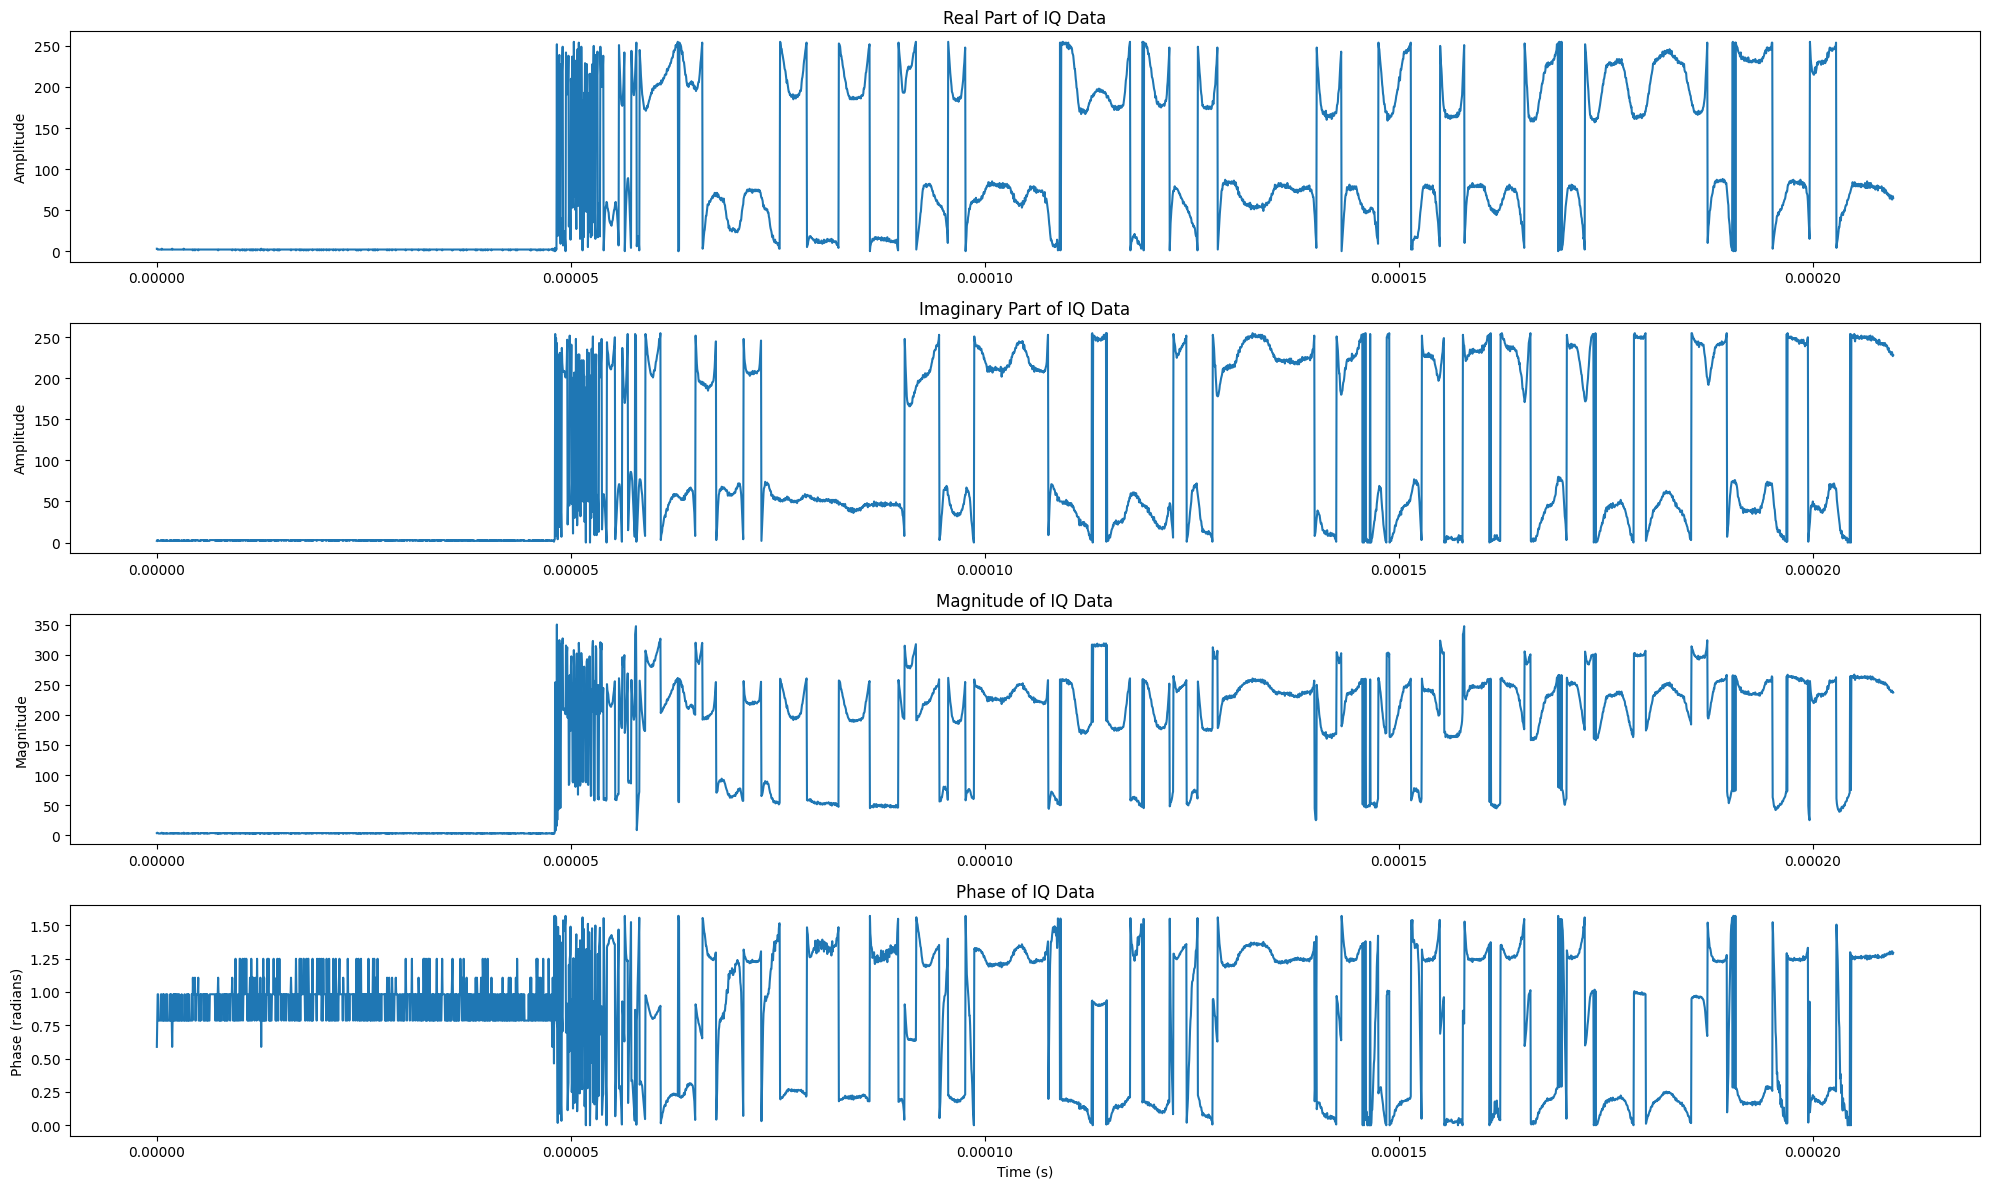

In [14]:
plt.figure(figsize=(20,12))

# 1. Plot Real Part
plt.subplot(4, 1, 1)
plt.plot(t, IQ_sample.real)
plt.title('Real Part of IQ Data')
plt.ylabel('Amplitude')

# 2. Plot Imaginary Part
plt.subplot(4, 1, 2)
plt.plot(t, IQ_sample.imag)
plt.title('Imaginary Part of IQ Data')
plt.ylabel('Amplitude')

# 3. Plot Magnitude
plt.subplot(4, 1, 3)
plt.plot(t, np.abs(IQ_sample))
plt.title('Magnitude of IQ Data')
plt.ylabel('Magnitude')

# 4. Plot Phase
plt.subplot(4, 1, 4)
plt.plot(t, np.angle(IQ_sample))
plt.title('Phase of IQ Data')
plt.ylabel('Phase (radians)')
plt.xlabel('Time (s)')

plt.tight_layout()
plt.show()
